# CNN 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import Audio
from utils import read_file, transform_path

import fastai
from fastai.vision import * 

import librosa
import librosa.display

random_state = 2020
sns.set( palette='cubehelix')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

print("FastAI Version:", fastai.__version__)
print("Librosa Version:", librosa.__version__)

FastAI Version: 1.0.60
Librosa Version: 0.7.2


In [2]:
NSynth_Images = Path('../data/non_images2')

In [3]:
instrument_family_pattern = r'(\w+)_\w+_\d+-\d+-\d+.png$'

data = (ImageList.from_folder(NSynth_Images)
            .split_by_folder()
            .label_from_re(instrument_family_pattern)
            .databunch())
data.c, data.classes

(8,
 ['brass', 'flute', 'guitar', 'keyboard', 'mallet', 'reed', 'string', 'vocal'])

In [4]:
xs, ys = data.one_batch()
xs.shape, ys.shape

(torch.Size([64, 3, 40, 251]), torch.Size([64]))

In [5]:
xs.min(), xs.max(), xs.mean(), xs.std()

(tensor(0.0039), tensor(0.9922), tensor(0.3450), tensor(0.2174))

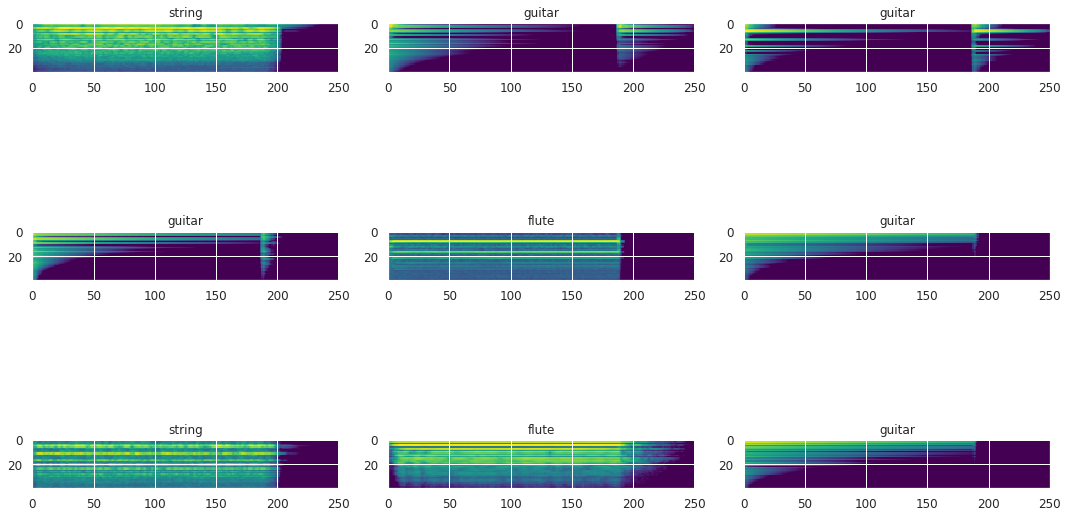

In [6]:
data.show_batch(3, figsize=(15, 10), hide_axis=False)

epoch,train_loss,valid_loss,accuracy,time
0,3.201169,2.375748,0.218750,00:02
1,2.308315,1.597081,0.462500,00:01
2,1.551078,0.806908,0.762500,00:01
3,1.091689,0.684450,0.787500,00:01
4,0.785230,0.647764,0.787500,00:01
5,0.590022,0.647638,0.793750,00:01
6,0.448759,0.619866,0.800000,00:01
7,0.347030,0.585025,0.812500,00:01
8,0.276932,0.580697,0.818750,00:01
9,0.222093,0.599125,0.812500,00:01


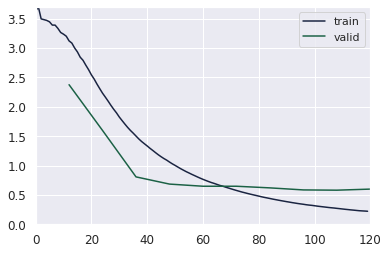

In [7]:
learn = cnn_learner(data, models.resnet18, pretrained=True, metrics=accuracy, callback_fns=ShowGraph)

learn.fit_one_cycle(10, 1e-3)

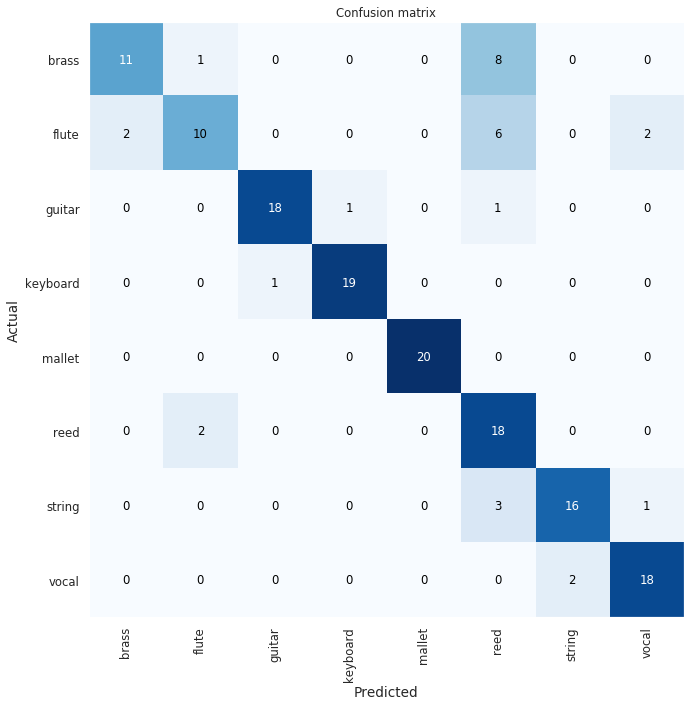

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=70)

In [9]:
display(interp.most_confused())

[('brass', 'reed', 8),
 ('flute', 'reed', 6),
 ('string', 'reed', 3),
 ('flute', 'brass', 2),
 ('flute', 'vocal', 2),
 ('reed', 'flute', 2),
 ('vocal', 'string', 2),
 ('brass', 'flute', 1),
 ('guitar', 'keyboard', 1),
 ('guitar', 'reed', 1),
 ('keyboard', 'guitar', 1),
 ('string', 'vocal', 1)]

epoch,train_loss,valid_loss,accuracy,time
0,2.868336,1.907856,0.231250,00:04
1,1.737214,1.368577,0.518750,00:02
2,1.087561,0.834548,0.725000,00:02
3,0.739985,0.484415,0.837500,00:02
4,0.525836,0.363348,0.881250,00:02
5,0.387047,0.342617,0.868750,00:02
6,0.291459,0.319816,0.875000,00:02
7,0.221200,0.315349,0.881250,00:02
8,0.170758,0.319591,0.881250,00:02
9,0.134351,0.316322,0.887500,00:02


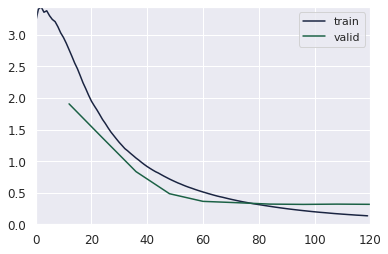

In [10]:
learn = cnn_learner(data, models.densenet121, pretrained=True, metrics=accuracy, callback_fns=ShowGraph)

learn.fit_one_cycle(10, 1e-3)

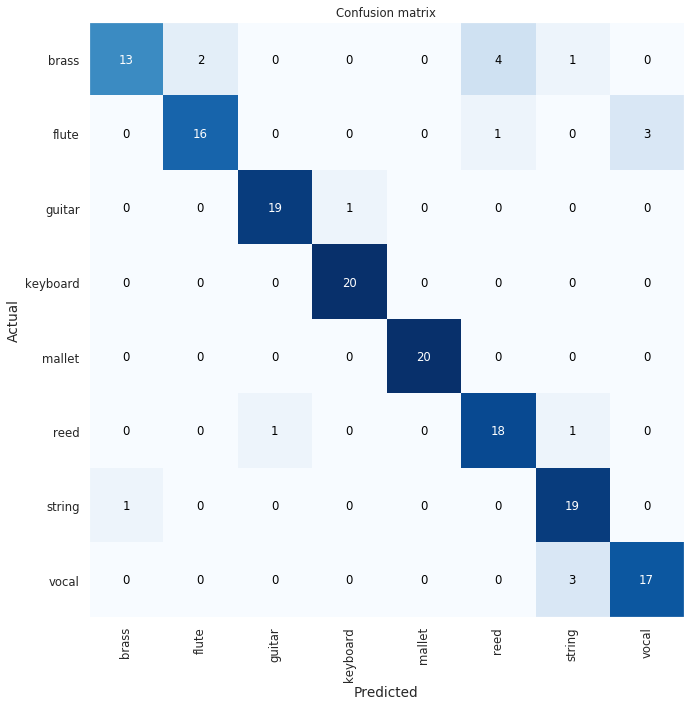

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=70)

In [12]:
display(interp.most_confused())

[('brass', 'reed', 4),
 ('flute', 'vocal', 3),
 ('vocal', 'string', 3),
 ('brass', 'flute', 2),
 ('brass', 'string', 1),
 ('flute', 'reed', 1),
 ('guitar', 'keyboard', 1),
 ('reed', 'guitar', 1),
 ('reed', 'string', 1),
 ('string', 'brass', 1)]

epoch,train_loss,valid_loss,accuracy,time
0,2.577125,1.968715,0.231250,00:03
1,1.461510,1.260670,0.618750,00:02
2,0.913894,0.836586,0.737500,00:02
3,0.613186,0.661962,0.775000,00:02
4,0.433190,0.497672,0.875000,00:02
5,0.316953,0.412658,0.875000,00:02


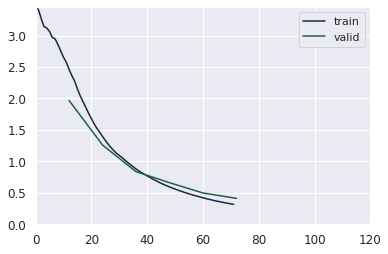

In [ ]:
learn = cnn_learner(data, models.densenet169,  pretrained=True, metrics=accuracy, callback_fns=ShowGraph)

learn.fit_one_cycle(10, 1e-3)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=70)

In [ ]:
display(interp.most_confused())